In [1]:
import pysolr
import pandas as pd

import pysolr
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows=200
import matplotlib as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)
import numpy as np
import copy as cp
import seaborn as sns
import json

Populating the interactive namespace from numpy and matplotlib


/Users/300032675/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
solrcon = pysolr.Solr('http://localhost:8984/solr/sprod', timeout=100,search_handler='query')


In [3]:
field_list = ['global_attr_*','styleid','product','*_article_attr','global_attr_article_type','count_options_availbale','styletype']

In [4]:
# with open('/Users/300032675/Library/Preferences/IntelliJIdea2018.1/scratches/scratch_4.json','r') as json_file :
#     styles_json = json.load(json_file)
    
with open('/Users/300032675/Library/Preferences/IntelliJIdea2018.1/scratches/scratch_16.txt','r') as json_file :
    styles_json = json.load(json_file)

# with open('/Users/300032675/Library/Preferences/IntelliJIdea2018.1/scratches/scratch_10.json','r') as json_file :
#     styles_json = json.load(json_file)

In [5]:
lst = map(lambda x: 'styleid:'+x,styles_json.keys())

In [6]:
style_query = " OR ".join(lst)

In [7]:
results = solrcon.search(q=style_query,rows=10000,fl=field_list,df='full_text_myntra')

In [8]:
docs_df = pd.DataFrame(results.docs)

In [9]:
cols = docs_df.columns
global_attrs = [c for c in cols if 'global_attr_' in c and c.lower().split('_')[-1] != 'facet']
global_attrs

[u'global_attr_age_group',
 u'global_attr_article_type',
 u'global_attr_base_colour',
 u'global_attr_base_colour_hex',
 u'global_attr_brand',
 u'global_attr_catalog_add_date',
 u'global_attr_colour1',
 u'global_attr_colour2',
 u'global_attr_fashion_type',
 u'global_attr_gender',
 u'global_attr_gender_string',
 u'global_attr_master_category',
 u'global_attr_season',
 u'global_attr_style_category',
 u'global_attr_sub_category',
 u'global_attr_usage',
 u'global_attr_year']

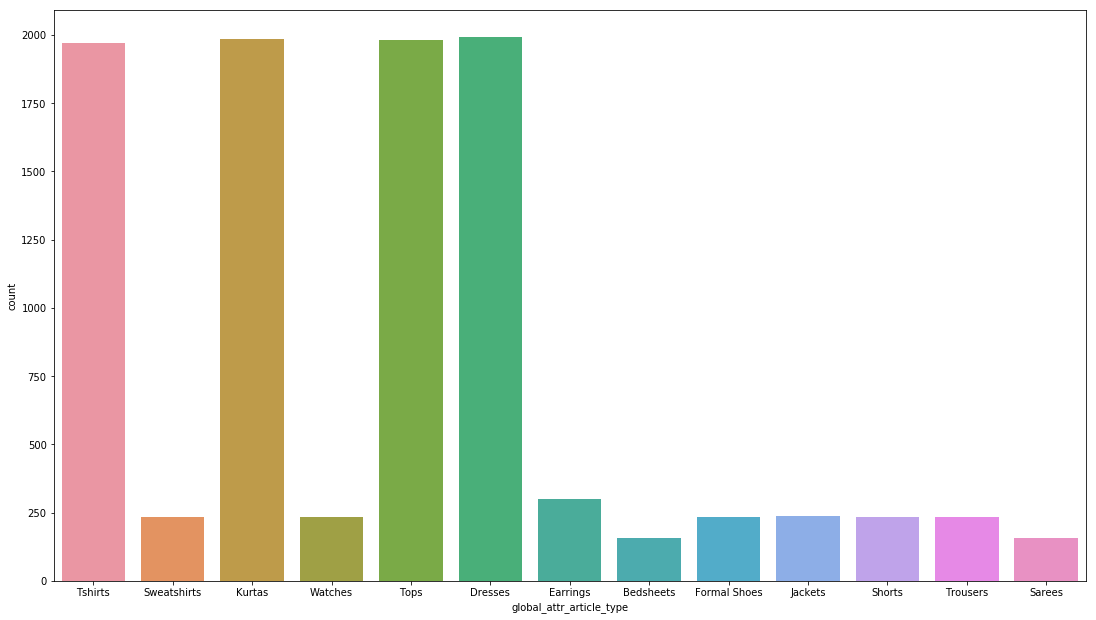

In [10]:
fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
sns.countplot(docs_df.global_attr_article_type)

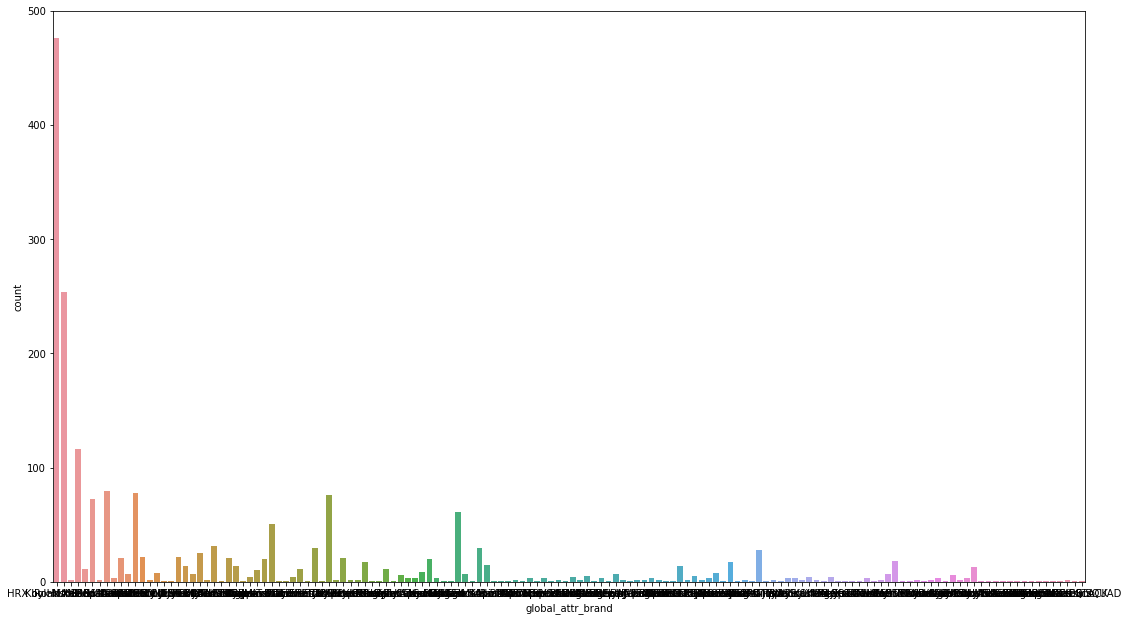

In [11]:
fig, axs = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
sns.countplot(docs_df[docs_df.global_attr_article_type=='Tshirts']['global_attr_brand'])

In [14]:
results.docs

[{u'Body_or_Garment_Size_article_attr': [u'garment measurements in'],
  u'Fabric_2_article_attr': [u'na'],
  u'Fabric_3_article_attr': [u'na'],
  u'Fabric_article_attr': [u'cotton'],
  u'Fit_article_attr': [u'regular fit'],
  u'Length_article_attr': [u'regular'],
  u'Main_Trend_article_attr': [u'typography or slogan prints'],
  u'Multipack_Set_article_attr': [u'single'],
  u'Neck_article_attr': [u'round neck'],
  u'Number_of_Pockets_article_attr': [u'na'],
  u'Occasion_article_attr': [u'casual'],
  u'Pattern_Coverage_article_attr': [u'full-front'],
  u'Print_or_Pattern_Type_article_attr': [u'abstract'],
  u'Sleeve_Length_article_attr': [u'short sleeves'],
  u'Sleeve_Styling_article_attr': [u'regular sleeves'],
  u'Surface_Styling_article_attr': [u'na'],
  u'Wash_Care_article_attr': [u'machine wash'],
  u'count_options_availbale': 0,
  u'full_text_article_attr': [u'garment measurements in',
   u'short sleeves',
   u'regular sleeves',
   u'single',
   u'casual',
   u'typography or slogan

In [12]:
ls

personalization.ipynb
